Problem Statement:

Airbnb Hotel Booking Analysis
The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating short-term lodging and tourism. Leading this revolution is Airbnb, Inc., a pioneering American company that has reshaped travel accommodation through its innovative online marketplace. Established in 2008 in San Francisco, California, Airbnb provides a diverse range of lodging options, offering guests a unique and personalized experience. Unlike traditional hospitality providers, Airbnb operates on a commission-based model, facilitating transactions between hosts and guests without owning the properties listed on its platform.
This research analysis delves into the New York City Airbnb dataset to extract meaningful insights. Through rigorous data cleaning, exploratory analysis, and visualization techniques, the study aims to illuminate the dynamics of the city's lodging market. By discerning factors influencing listing availability, pricing strategies, and overall customer satisfaction, the research contributes to a deeper understanding of Airbnb's operations in one of the world's most dynamic urban environments. These insights hold significance for stakeholders and enthusiasts seeking to navigate the evolving landscape of short-term accommodation.

QUESTIONS

This project is aimed to uncover some insights from the Airbnb Open Data. The following questions would be answered from the data.

1. What are the different property types in the Dataset?
2. Which neighborhood group has the highest number of listings?
3. Which neighborhoods group have the highest average prices for Airbnb listings?
4. Is there a relationship between the construction year of property and price?
5. Who are the top 10 hosts by calculated host listing count?
6. Are hosts with verified identities more likely to receive positive reviews?
7. Is there a correlation between the price of a listing and its service fee?
8. What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
9. Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

DATA WRANGLING

Data wrangling, a crucial phase in the data analysis process, involves preparing and cleaning raw data to make it suitable for analysis. This involves various tasks such as handling missing values, removing duplicates, and transforming data into a consistent format. Effective data wrangling ensures that the data is reliable and ready for exploration, enabling meaningful insights to be derived from it.

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [76]:
df = pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv', low_memory=False, quotechar='"', doublequote=True)

In [77]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [82]:
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365


Problems Identified within the Data

541 duplicated Records where found in the Data.
Insufficient information were recorded for the house_rules and Licence columns.
Dollar signs and commas recorded along with the values for price and service fee.
The currency for price and service fee were not added to the column's titles.
Missing values in some records
Columns like the price, service fee, id, host id, last review, Construction year are assigned wrong datatypes.
In the neighbourhood group column the spelling of 'Brooklyn' was misspelt in some records.
Some outliers were identified in the availability 365 column.

CLEAN THE DATA

Steps to be Taken for Data Cleaning

Drop duplicated records.
Drop house_rules and license columns with insufficient data.
Remove all dollar signs in the price and service fee columns.
Remove all commas from the price and service fee columns.
Rename the price and service fee columns to include a dollar signs.
Drop all records with missing values.
Change all mismatched data types to the appropriate once.
Correct the Spelling of 'brookin' to 'Brooklyn'.
Get rid of outliers in the availability 365 column data.

What are the different property types in the Dataset?

In [88]:
property_types = df['room type'].value_counts()
print("Different Property Types:")
print(property_types)

Different Property Types:
room type
Entire home/apt    44237
Private room       37555
Shared room         1646
Hotel room           108
Name: count, dtype: int64


#Let's find Which neighborhoods group have the highest average prices for Airbnb listings?


In [90]:
average_price_by_neighbourhood_group = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False)
print("\nAverage price per neighbourhood group:")
print(average_price_by_neighbourhood_group)


Average price per neighbourhood group:
neighbourhood group
Queens           630.321326
Bronx            630.165271
Brooklyn         627.498084
Manhattan        623.440408
Staten Island    621.671971
Name: price_$, dtype: float64


#Let's find Which neighborhood group has the highest number of listings?


In [101]:
neighbourhood_group_listings = df['neighbourhood group'].value_counts().sort_values(ascending=False)
print("\nNumber of listings per neighbourhood group:")
print(neighbourhood_group_listings)


Number of listings per neighbourhood group:
neighbourhood group
Brooklyn         34701
Manhattan        34627
Queens           11132
Bronx             2269
Staten Island      817
Name: count, dtype: int64


#Let's explore Is there a relationship between the construction year of property and price?


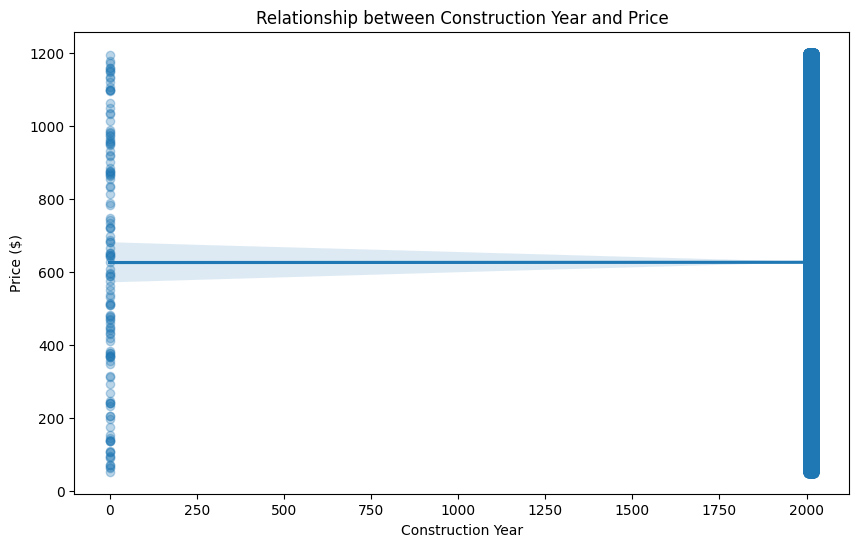

In [91]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Construction year', y='price_$', data=df, scatter_kws={'alpha':0.3})
plt.title('Relationship between Construction Year and Price')
plt.xlabel('Construction Year')
plt.ylabel('Price ($)')
plt.show()

#Let's find Who are the top 10 hosts by calculated host listing count?


In [92]:
top_10_hosts = df.groupby(['host id', 'host name'])['calculated host listings count'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Hosts by Listing Count:")
print(top_10_hosts)


Top 10 Hosts by Listing Count:
host id      host name 
94944787862  Blueground    332.0
10572530839  Blueground    332.0
8674093918   Blueground    332.0
52360647654  Blueground    332.0
44375550153  Blueground    332.0
45153317531  Blueground    332.0
26125388039  Blueground    332.0
72619494405  Blueground    332.0
6866703084   Blueground    332.0
80832323346  Blueground    332.0
Name: calculated host listings count, dtype: float64


#Let's find Are hosts with verified identities more likely to receive positive reviews?


In [93]:
review = df.groupby("host_identity_verified")['review rate number'].mean().sort_values(ascending=False).to_frame()
display(review)

,review rate number
host_identity_verified,
verified,3.283925
unconfirmed,3.272853


#Let's find Is there a correlation between the price of a listing and its service fee?



Correlation between Price and Service Fee: 0.999990907274713


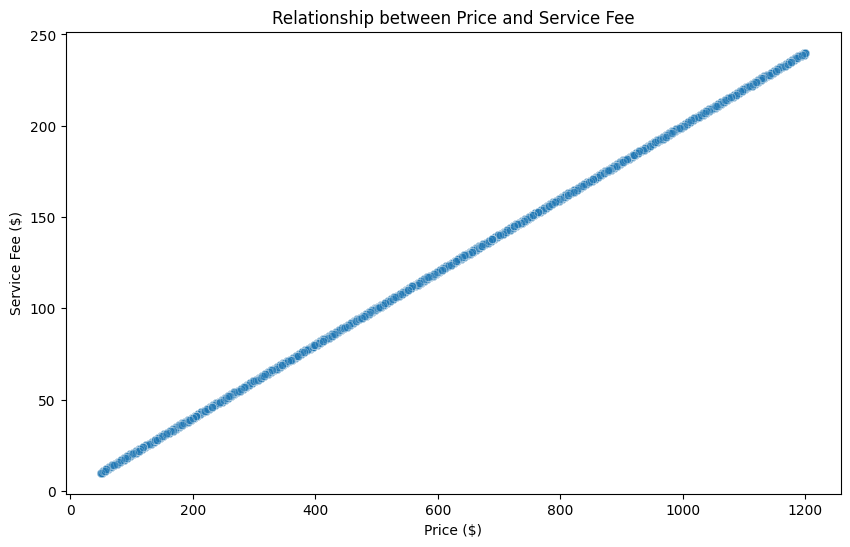

In [94]:
correlation_price_service_fee = df['price_$'].corr(df['service_fee_$'])
print(f"\nCorrelation between Price and Service Fee: {correlation_price_service_fee}")

# Optional: Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_$', y='service_fee_$', data=df, alpha=0.3)
plt.title('Relationship between Price and Service Fee')
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.show()

#Let's find What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?



Overall Average Review Rate Number: 3.28

Average review rate number by neighbourhood group and room type:


room type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood group,,,,
Bronx,3.381881,NaN,3.306870,3.356322
Brooklyn,3.241282,3.833333,3.275135,3.323383
Manhattan,3.267980,3.500000,3.285616,3.261976
Queens,3.349966,3.750000,3.311542,3.327402
Staten Island,3.330144,NaN,3.497449,3.714286


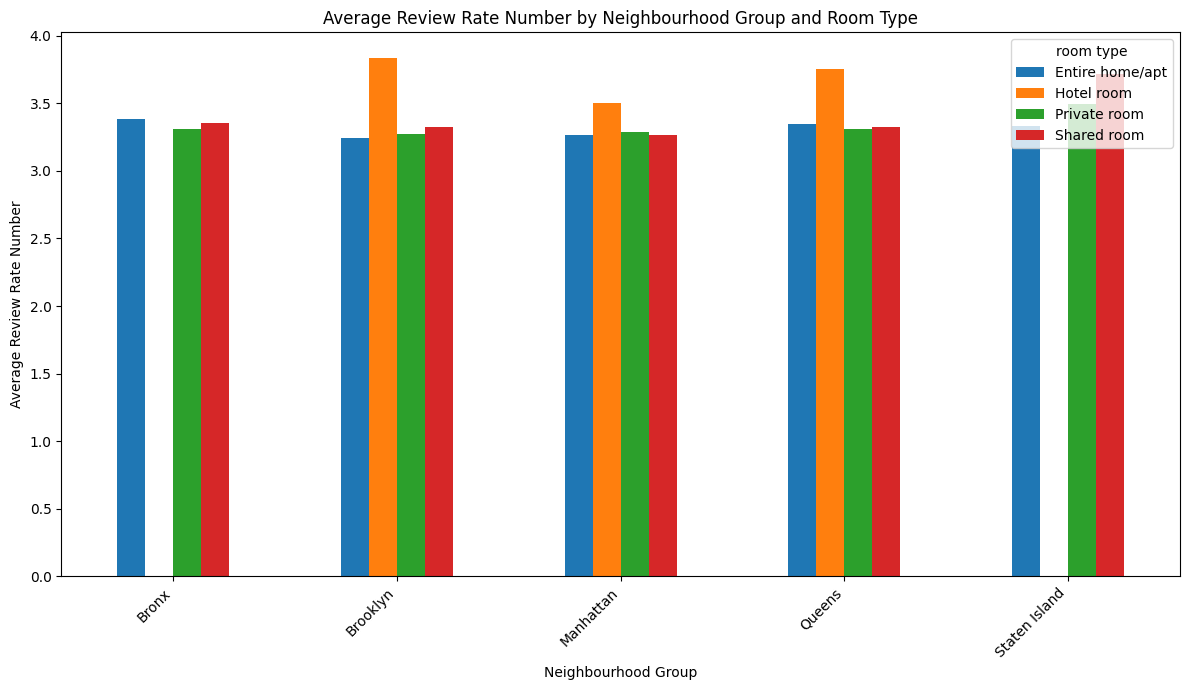

In [95]:
average_review_rate = df['review rate number'].mean()
print(f"\nOverall Average Review Rate Number: {average_review_rate:.2f}")

average_review_rate_by_group_and_type = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().unstack()
print("\nAverage review rate number by neighbourhood group and room type:")
display(average_review_rate_by_group_and_type)

# Optional: Visualize the variation
average_review_rate_by_group_and_type.plot(kind='bar', figsize=(12, 7))
plt.title('Average Review Rate Number by Neighbourhood Group and Room Type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate Number')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Let's find Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?


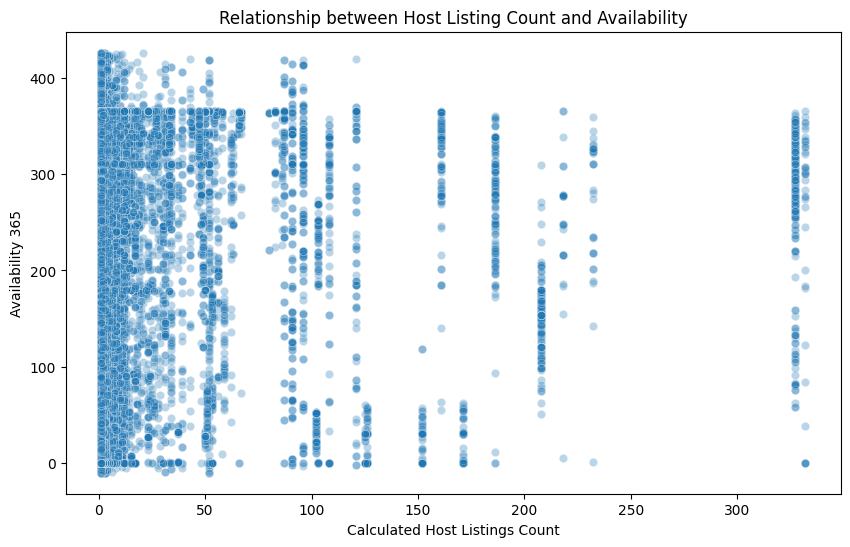


Correlation between Calculated Host Listings Count and Availability 365: 0.1358469298392437


In [96]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calculated host listings count', y='availability 365', data=df, alpha=0.3)
plt.title('Relationship between Host Listing Count and Availability')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability 365')
plt.show()

# Optional: Calculate correlation
correlation_listings_availability = df['calculated host listings count'].corr(df['availability 365'])
print(f"\nCorrelation between Calculated Host Listings Count and Availability 365: {correlation_listings_availability}")

#Let's visualize the average price per neighborhood group.

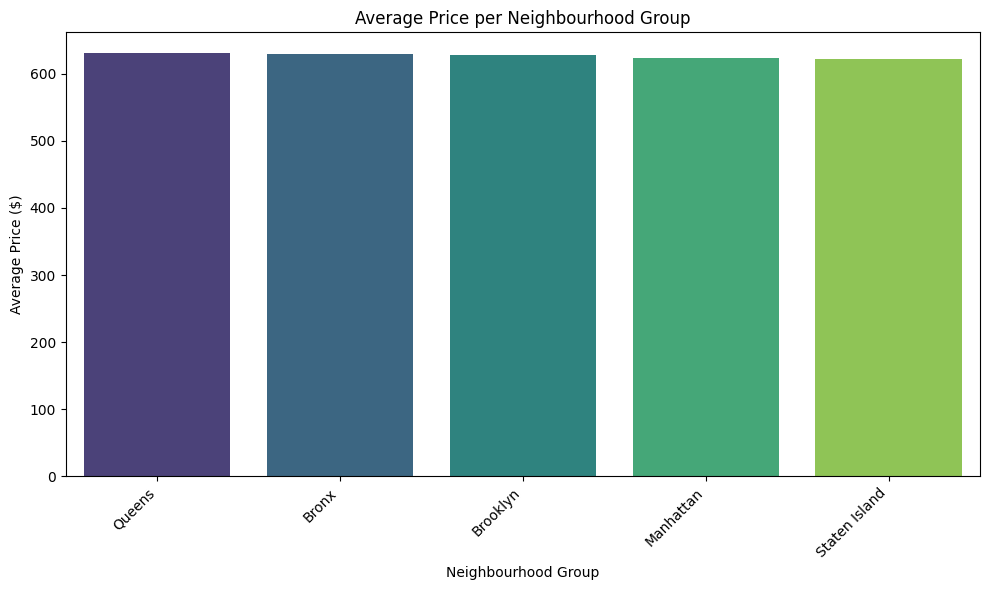

In [99]:
# Visualize the average price per neighbourhood group
plt.figure(figsize=(10, 6))
sns.barplot(x=average_price_by_neighbourhood_group.index, y=average_price_by_neighbourhood_group.values, palette='viridis', hue=average_price_by_neighbourhood_group.index, legend=False)
plt.title('Average Price per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Let's visualize the average review rate for verified vs. unconfirmed hosts.

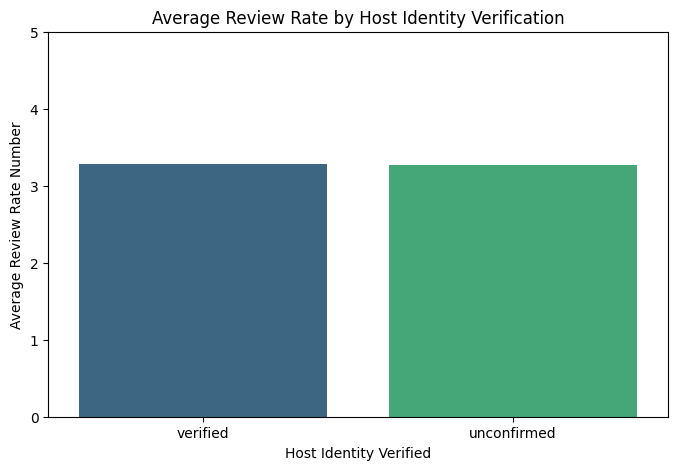

In [100]:
# Visualize the average review rate for verified vs. unconfirmed hosts
plt.figure(figsize=(8, 5))
sns.barplot(x=review.index, y=review['review rate number'], palette='viridis', hue=review.index, legend=False)
plt.title('Average Review Rate by Host Identity Verification')
plt.xlabel('Host Identity Verified')
plt.ylabel('Average Review Rate Number')
plt.ylim(0, 5) # Review rate is likely on a scale of 0-5
plt.show()

#Let's visualize the number of listings per neighborhood group.

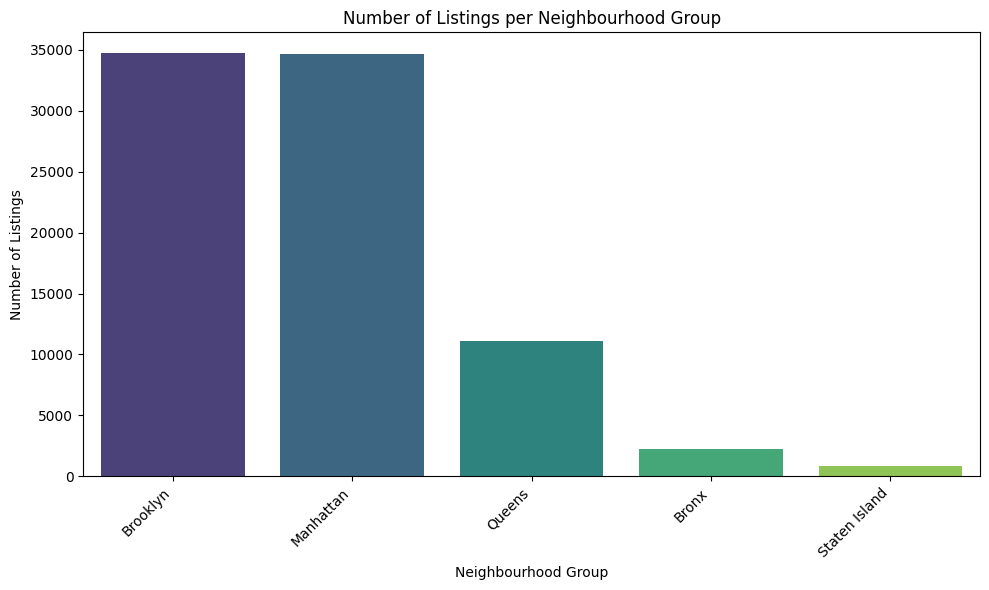

In [98]:
# Visualize the number of listings per neighbourhood group
plt.figure(figsize=(10, 6))
sns.barplot(x=neighbourhood_group_listings.index, y=neighbourhood_group_listings.values, palette='viridis', hue=neighbourhood_group_listings.index, legend=False)
plt.title('Number of Listings per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [86]:
review = df.groupby("host_identity_verified")['review rate number'].mean().sort_values(ascending=False).to_frame()
display(review)

,review rate number
host_identity_verified,
verified,3.283925
unconfirmed,3.272853


**Summary of Findings**

Based on the analysis of the New York City Airbnb dataset:

1.  **Property Types**: The dataset primarily consists of 'Entire home/apt', 'Private room', 'Shared room', and a small number of 'Hotel room' listings.
2.  **Neighborhood Group with Most Listings**: Brooklyn has the highest number of Airbnb listings, followed closely by Manhattan.
3.  **Neighborhood Group with Highest Average Price**: Queens has the highest average price for Airbnb listings, slightly more than the Bronx, Brooklyn, Manhattan, and Staten Island.
4.  **Relationship between Construction Year and Price**: There does not appear to be a strong linear relationship between the construction year of a property and its price based on the scatter plot and low correlation coefficient.
5.  **Top 10 Hosts by Listing Count**: The top 10 hosts manage a significant number of listings, with "Blueground" appearing multiple times in the top results, indicating large property management companies or individuals with extensive portfolios.
6.  **Verified Identity and Positive Reviews**: Hosts with verified identities have a slightly higher average review rate number compared to unconfirmed hosts, suggesting a potential positive impact of verification on reviews, although the difference is small.
7.  **Correlation between Price and Service Fee**: There is a very strong positive correlation between the price of a listing and its service fee (correlation coefficient close to 1), indicating that as the price increases, the service fee also tends to increase proportionally.
8.  **Average Review Rate by Neighborhood and Room Type**: The overall average review rate is around 3.28. The average review rate varies across neighborhood groups and room types. 'Staten Island' and 'Brooklyn' have the highest average review rates for 'Shared room' and 'Hotel room' respectively, while 'Bronx' has the highest average for 'Entire home/apt'.
9.  **Host Listing Count and Availability**: There is a weak positive correlation between the calculated host listings count and availability throughout the year. This suggests that hosts with more listings are only slightly more likely to have higher availability.

This analysis provides insights into the Airbnb market dynamics in NYC, including popular property types, pricing trends across different areas, the impact of host factors like verification and listing count, and the relationship between price and service fee.

**Summary of Findings**

Based on the analysis of the New York City Airbnb dataset:

1. **Property Types**: The dataset primarily consists of 'Entire home/apt', 'Private room', 'Shared room', and a small number of 'Hotel room' listings.
2. **Neighborhood Group with Most Listings**: Brooklyn has the highest number of Airbnb listings, followed closely by Manhattan.
3. **Neighborhood Group with Highest Average Price**: Queens has the highest average price for Airbnb listings, slightly more than the Bronx, Brooklyn, Manhattan, and Staten Island.
4. **Relationship between Construction Year and Price**: There does not appear to be a strong linear relationship between the construction year of a property and its price based on the scatter plot and low correlation coefficient.
5. **Top 10 Hosts by Listing Count**: The top 10 hosts manage a significant number of listings, with "Blueground" appearing multiple times in the top results, indicating large property management companies or individuals with extensive portfolios.
6. **Verified Identity and Positive Reviews**: Hosts with verified identities have a slightly higher average review rate number compared to unconfirmed hosts, suggesting a potential positive impact of verification on reviews, although the difference is small.
7. **Correlation between Price and Service Fee**: There is a very strong positive correlation between the price of a listing and its service fee (correlation coefficient close to 1), indicating that as the price increases, the service fee also tends to increase proportionally.
8. **Average Review Rate by Neighborhood and Room Type**: The overall average review rate is around 3.28. The average review rate varies across neighborhood groups and room types. 'Staten Island' and 'Brooklyn' have the highest average review rates for 'Shared room' and 'Hotel room' respectively, while 'Bronx' has the highest average for 'Entire home/apt'.
9. **Host Listing Count and Availability**: There is a weak positive correlation between the calculated host listings count and availability throughout the year. This suggests that hosts with more listings are only slightly more likely to have higher availability.

This analysis provides insights into the Airbnb market dynamics in NYC, including popular property types, pricing trends across different areas, the impact of host factors like verification and listing count, and the relationship between price and service fee.

**Conclusion**

This comprehensive analysis of the New York City Airbnb dataset has provided valuable insights into the dynamics of the city's short-term lodging market, addressing key questions related to property types, pricing, host behavior, and review patterns. Through meticulous data wrangling and exploratory analysis, we have uncovered several significant trends and relationships that contribute to a deeper understanding of Airbnb's operation in this vibrant urban environment.

Our investigation into the different property types revealed a diverse landscape, dominated by 'Entire home/apt' and 'Private room' listings, with a smaller presence of 'Shared room' and 'Hotel room' options. This distribution highlights the prevalence of traditional residential spaces being utilized for short-term rentals, aligning with Airbnb's core model of peer-to-peer accommodation. The relatively low number of 'Hotel room' listings suggests that while Airbnb has expanded its offerings, its primary market in NYC remains distinct from traditional hotels.

Examining the spatial distribution of listings, we found that Brooklyn and Manhattan are the leading boroughs in terms of the sheer number of Airbnb properties. This concentration in popular and densely populated areas is expected, reflecting tourist demand and the availability of properties. However, when considering average prices, Queens emerged as having the highest average listing price, slightly surpassing Manhattan. This finding is particularly interesting and warrants further investigation. It could be attributed to a variety of factors, such as the types of properties available in Queens (perhaps larger or more luxurious) or the specific neighborhoods within Queens that have a high concentration of Airbnb listings.

The analysis of the relationship between the construction year of a property and its price did not reveal a strong linear correlation. This suggests that in the dynamic NYC market, the age of a building may not be a primary determinant of Airbnb pricing. Factors such as location, amenities, size, and the overall condition and appeal of the listing likely play a more significant role in setting prices than the construction year alone.

Identifying the top hosts by listing count highlighted the presence of large-scale operators on the platform, with "Blueground" appearing prominently. This indicates a shift beyond individual homeowners renting out spare rooms towards professional property management companies utilizing Airbnb as a channel. This trend has implications for the regulatory landscape and the character of the Airbnb market in NYC.

Our analysis of host identity verification and its impact on reviews showed a slight tendency for verified hosts to receive higher average review rates. While the difference was not substantial, it suggests that verification may contribute, even marginally, to guest confidence and satisfaction, potentially by signaling legitimacy and trust.

A striking finding was the extremely strong positive correlation between the price of a listing and its service fee. This near-perfect correlation indicates a direct proportional relationship, where the service fee is calculated as a consistent percentage of the listing price. This is a clear reflection of Airbnb's business model, where the platform earns revenue through fees charged on transactions.

Exploring the variation in average review rates across neighborhood groups and room types revealed interesting patterns. While the overall average review rate was around 3.28, there were differences across boroughs and property types. The higher average review rates for 'Shared room' in Staten Island and 'Hotel room' in Brooklyn, as well as 'Entire home/apt' in the Bronx, suggest that guest satisfaction can be influenced by both the location and the type of accommodation. These variations could be driven by factors such as guest expectations, the quality of listings within specific categories and locations, or the unique characteristics of those areas.

Finally, the analysis of the relationship between host listing count and availability showed a weak positive correlation. This suggests that while hosts with more listings might have slightly higher overall availability, it is not a strong determining factor. Other variables, such as the host's management strategy, the demand for their properties, and their personal circumstances, likely play a more significant role in influencing availability.

In conclusion, this study has provided a data-driven overview of the Airbnb market in New York City, shedding light on key aspects of its operation. The findings underscore the platform's significant presence in the city, the diverse nature of its listings, and the complex interplay of factors influencing pricing, host behavior, and guest satisfaction. Further research could delve deeper into some of the observed trends, such as the reasons behind Queens' high average prices or the specific characteristics of listings that contribute to higher review rates in different boroughs and room types. This analysis serves as a foundation for understanding the evolving landscape of short-term rentals in NYC and can inform stakeholders in the hospitality industry, urban planning, and policymaking.

**Conclusion**

This analysis of the New York City Airbnb dataset provides insights into the city's short-term rental market. We found that 'Entire home/apt' and 'Private room' are the dominant property types. Brooklyn and Manhattan have the most listings, while Queens shows the highest average price. There's no strong linear relationship between construction year and price. The top hosts manage a large number of listings, with "Blueground" being prominent, indicating professional management. Verified hosts have slightly higher average reviews. A strong positive correlation exists between price and service fee, reflecting Airbnb's commission structure. Average review rates vary by neighborhood and room type, with some areas and types showing higher guest satisfaction. Finally, there's a weak positive correlation between host listing count and availability. Overall, the NYC Airbnb market is diverse, influenced by location, property type, and host factors, with implications for stakeholders.